In [1]:
import numpy as np
import matplotlib.pyplot as plt

from meccomp_lib import *

In [10]:
from oct2py import Oct2Py

# Inicializar uma instância do Octave
oc = Oct2Py()


oc.source('meccomp_lib/ex_1/functions.m')




-7.818733453526027


In [7]:


class RK4(BaseMethod):
    def __init__(self, step:float=0.01, simulation_time:float = 10):
        super().__init__(step=step, simulation_time=simulation_time)
       
    def apply_f(self, state):
        theta_1 = state[0]
        theta_1_dot = state[1]
        theta_2 = state[3]
        theta_2_dot = state[4]
        state_kwargs ={
            'theta_1' : theta_1,
            'theta_1_dot' : theta_1_dot,
            'theta_2' : theta_2,
            'theta_2_dot' : theta_2_dot, 
        }
        
        next_theta_1 = theta_1 + self.step*theta_1_dot
        next_theta_1_dot_dot = self.system.theta_1_dot_dot(**state_kwargs)
        next_theta_1_dot = theta_1_dot + self.step*next_theta_1_dot_dot
        
        next_theta_2 = theta_2 + self.step*theta_2_dot
        next_theta_2_dot_dot = self.system.theta_2_dot_dot(**state_kwargs)
        next_theta_2_dot = theta_2_dot + self.step*next_theta_2_dot_dot
        
        next_state =[next_theta_1, next_theta_1_dot, next_theta_1_dot_dot, 
                        next_theta_2, next_theta_2_dot, next_theta_2_dot_dot]
        
        #next_state = [0 if np.isnan(x) else x for x in next_state]
        #next_state = [0 if np.isinf(x) else x for x in next_state]
        
        #next_state = [round(value,4) for value in next_state]

        return next_state
        
        
    def simul(self):
        self.system.reset()
        for time_step in range(self.n_steps): 
            current_state = self.system.get_current_state()
            current_state = np.array(list(current_state.values()))
            
            k1 = self.apply_f(current_state)
            k1 = np.array(k1)
            
            k2_state = current_state + (self.step/2)*k1
            k2 = self.apply_f(k2_state)
            k2 = np.array(k2)
            
            k3_state = current_state + (self.step/2)*k2
            k3 = self.apply_f(k3_state)
            k3 = np.array(k3)
            
            k4_state = current_state + (self.step)*k3
            k4 = self.apply_f(k4_state)
            
            next_state = current_state + (self.step/6)*(k1 + 2*k2 + 2*k3 + k4)
            next_state[2] = k1[2]
            next_state[5] = k1[5]
            
            self.system.insert_state(list(next_state))
            


rk = RK4(step=0.001, simulation_time=20)

rk.simul()

rk.plot_results()

ValueError: math domain error

In [6]:
# Python program to implement Runge Kutta method
# A sample differential equation "dy / dx = (x - y)/2"
def dydx(x, y):
    return ((x - y)/2)
 
# Finds value of y for a given x using step size h
# and initial value y0 at x0.
def rungeKutta(x0, y0, x, h):
    # Count number of iterations using step size or
    # step height h
    n = (int)((x - x0)/h) 
    # Iterate for number of iterations
    y = y0
    for i in range(1, n + 1):
        "Apply Runge Kutta Formulas to find next value of y"
        k1 = h * dydx(x0, y)
        k2 = h * dydx(x0 + 0.5 * h, y + 0.5 * k1)
        k3 = h * dydx(x0 + 0.5 * h, y + 0.5 * k2)
        k4 = h * dydx(x0 + h, y + k3)
 
        # Update next value of y
        y = y + (1.0 / 6.0)*(k1 + 2 * k2 + 2 * k3 + k4)
 
        # Update next value of x
        x0 = x0 + h
    return y
 
# Driver method
x0 = 0
y = 1
x = 2
h = 0.2
print ('The value of y at x is:', rungeKutta(x0, y, x, h))
 
# This code is contributed by Prateek Bhindwar

The value of y at x is: 1.1036393232374955


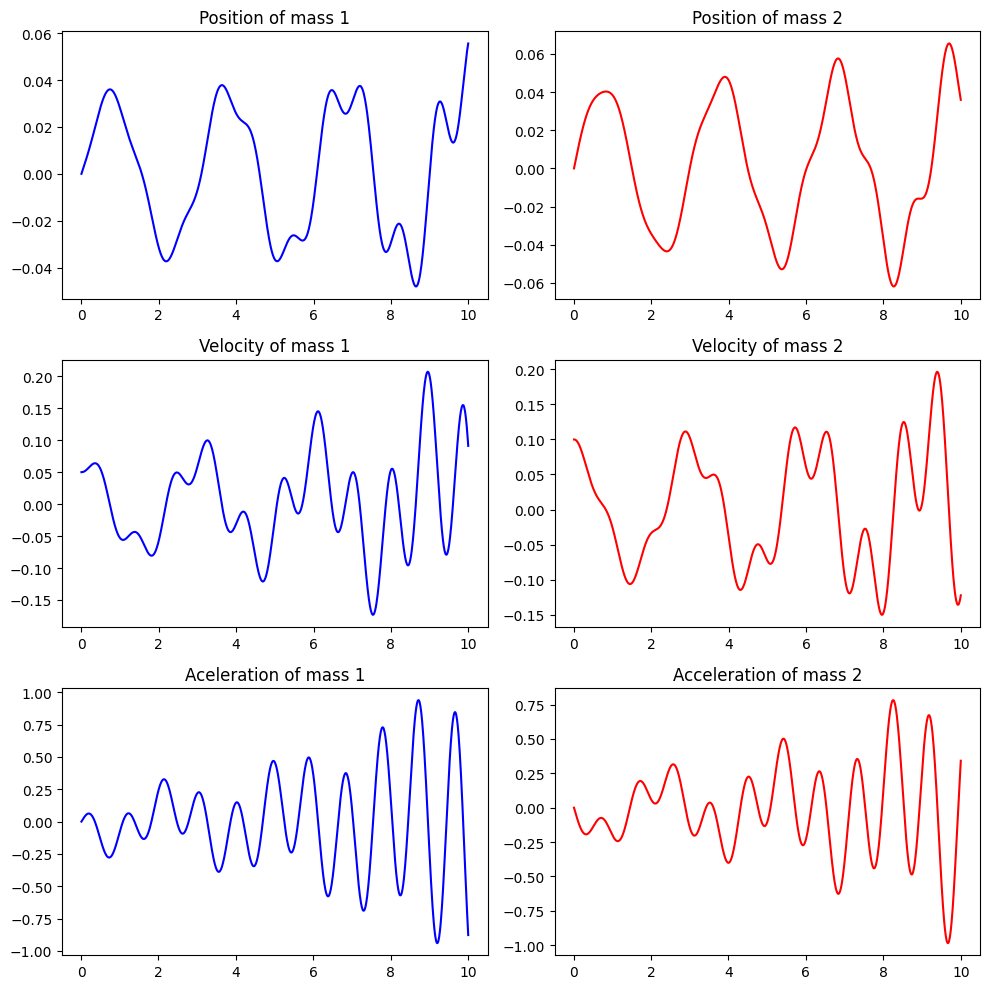

In [5]:
eu = Euler()

eu.simul()

eu.plot_results()

In [16]:
import math

class System:
    def __init__(self,
        m1:float=0.5,
        m2:float=1.0,
        l1:float=1.0,
        l2:float=1.5,
        theta_1_initial:float=0,
        theta_2_initial:float=0,
        theta_1_dot_initial:float=0.05,
        theta_2_dot_initial:float=0.1,
        theta_1_dot_dot_initial:float=np.nan,
        theta_2_dot_dot_initial:float=np.nan,
        step:float=0.1):
        self.m1 = m1
        self.m2 = m2
        self.l1 = l1
        self.l2 = l2
        self.theta_1_initial = theta_1_initial
        self.theta_2_initial = theta_2_initial
        self.theta_1_dot_initial = theta_1_dot_initial
        self.theta_2_dot_initial = theta_2_dot_initial
        self.theta_1_dot_dot_initial = theta_1_dot_dot_initial
        self.theta_2_dot_dot_initial = theta_2_dot_dot_initial
        self.step = step
        self.g = 9.8
        self.reset()
    
    def reset(self):
        self.current_step = 0
        self.state_memory = [[self.theta_1_initial, self.theta_1_dot_initial, self.theta_1_dot_dot_initial, 
                              self.theta_2_initial, self.theta_2_dot_initial, self.theta_2_dot_dot_initial]]
        
    
    def theta_1_dot_dot(self, **kwargs):
        theta_1 = kwargs.get('theta_1')
        theta_1_dot = kwargs.get('theta_1_dot')
        theta_2 = kwargs.get('theta_2')
        theta_2_dot = kwargs.get('theta_2_dot')
        
        num = (-np.sin(theta_1-theta_2)*(self.m2*self.l2*(theta_2_dot**2) 
                +self.m2*self.l1*(theta_1_dot**2)*np.cos(theta_1-theta_2)) 
            -self.g*((self.m1 +self.m2)*np.sin(theta_1) - self.m2*(np.sin(theta_2)*np.cos(theta_1-theta_2))))
        den = self.l1*(self.m1+self.m2*((np.sin(theta_1-theta_2))**2))
        return num/den
    
    def theta_2_dot_dot(self, **kwargs):
        theta_1 = kwargs.get('theta_1')
        theta_1_dot = kwargs.get('theta_1_dot')
        theta_2 = kwargs.get('theta_2')
        theta_2_dot = kwargs.get('theta_2_dot')
        num = (np.sin(theta_1-theta_2)*((self.m1+self.m2)*self.l1*(theta_1_dot**2) 
                +self.m2*self.l2*(theta_2_dot**2)*np.cos(theta_1-theta_2)) 
            +self.g*((self.m1 +self.m2)*(np.sin(theta_1)*np.cos(theta_1-theta_2)-np.sin(theta_2))))
        den = self.l2*(self.m1+self.m2*((np.sin(theta_1-theta_2))**2))
        return num/den
    
    def get_current_state(self):
        current_state = self.state_memory[self.current_step]
        state = {
            'theta_1': current_state[0],
            'theta_1_dot': current_state[1],
            'theta_1_dot_dot': current_state[2],
            'theta_2': current_state[3],
            'theta_2_dot': current_state[4],
            'theta_2_dot_dot': current_state[5]
        }
        return state
        
    def insert_state(self, state):
        self.state_memory.append(state)
        self.current_step += 1    
    
    
    def retrieve_states(self):
        return self.state_memory
    
    def retrieve_scalar_states(self):
        scalar_states = []
        for state in self.state_memory:
            theta_1 = state[0]
            theta_1_dot = state[1]
            theta_1_dot_dot = state[2]
            theta_2 = state[3]
            theta_2_dot = state[4]
            theta_2_dot_dot = state[5]            
            x_1 = self.l1*np.sin(theta_1)
            x_1_dot = self.l1*np.cos(theta_1)*theta_1_dot
            x_1_dot_dot = self.l1*np.cos(theta_1)*theta_1_dot_dot - self.l1*np.sin(theta_1)*(theta_1_dot**2)
            y_1 = self.l1*np.cos(theta_1)
            y_1_dot = -self.l1*np.sin(theta_1)*theta_1_dot
            y_1_dot_dot = -self.l1*np.cos(theta_1)*(theta_1_dot**2) - self.l1*np.sin(theta_1)*theta_1_dot_dot    
             
            x_2 = self.l2*np.sin(theta_2) + x_1
            x_2_dot = self.l2*np.cos(theta_2)*theta_2_dot + x_1_dot
            x_2_dot_dot = self.l2*np.cos(theta_2)*theta_2_dot_dot - self.l2*np.sin(theta_2)*(theta_2_dot**2)  + x_1_dot_dot
            y_2 = self.l2*np.cos(theta_2) + y_1
            y_2_dot = -self.l2*np.sin(theta_2)*theta_2_dot + y_1_dot
            y_2_dot_dot = -self.l2*np.cos(theta_2)*(theta_2_dot**2) - self.l2*np.sin(theta_2)*theta_2_dot_dot + y_1_dot_dot
            scalar_state = [[x_1, y_1],[x_1_dot, y_1_dot], [x_1_dot_dot, y_1_dot_dot],
                            [x_2, y_2],[x_2_dot, y_2_dot], [x_2_dot_dot, y_2_dot_dot]]
            scalar_states.append(scalar_state)
        return scalar_states

{'theta_1': 0,
 'theta_1_dot': 0.05,
 'theta_1_dot_dot': nan,
 'theta_2': 0,
 'theta_2_dot': 0.1,
 'theta_2_dot_dot': nan}

In [1]:
from oct2py import Oct2Py

# Inicialize uma instância do Octave
oc = Oct2Py()

# Execute um comando Octave
result = oc.sqrt(9.0)  # Calcula a raiz quadrada de 9.0 usando Octave

# Imprime o resultado
print(result)  # Saída esperada: 3.0

# Você também pode executar scripts Octave
script = '''
    A = [1, 2; 3, 4];
    b = [5; 6];
    x = A \ b;
'''

oc.eval(script)  # Executa o script Octave

# Acesse as variáveis criadas no ambiente Octave
x = oc.pull('x')  # Puxa a variável 'x' de Octave para Python
print(x)  # Saída esperada: [[-4.]; [4.5]]


3.0
[[-4. ]
 [ 4.5]]
